In [ ]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation,Input,Embedding, Dot
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.models import Model

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

In [ ]:
train=pd.read_csv(r'/content/ratings.csv')
df=train.copy()
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
len(df['userId'].unique())

610

In [ ]:
len(df['movieId'].unique())

9724

In [ ]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [ ]:
df['userId'].value_counts(ascending=True)

441      20
405      20
146      20
193      20
568      20
       ... 
273    1346
447    1864
473    2108
598    2478
413    2698
Name: userId, Length: 610, dtype: int64

In [ ]:
# creating utility matrix.
index=list(df['userId'].unique())
columns=list(df['movieId'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId')
util_df.fillna(0)


movieId,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
userId,,,,,,,,,,,,,,,,,,,,,
0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(df[['userId','movieId']],df[['rating']],test_size=0.20,random_state=42)
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [ ]:
userid2idx

In [ ]:
movieid2idx

In [ ]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(80803, 4) (20033, 4)


In [ ]:
train

,userId,movieId,rating,timestamp
0,0,0,4.0,964982703
1,0,1,4.0,964981247
2,0,2,4.0,964982224
3,0,3,5.0,964983815
4,0,4,5.0,964982931
...,...,...,...,...
100830,609,1091,4.0,1493879365
100831,609,3120,4.0,1493848402
100832,609,2035,5.0,1493850091
100834,609,1392,5.0,1493846352


In [ ]:
train.userId

0           0
1           0
2           0
3           0
4           0
         ... 
100830    609
100831    609
100832    609
100834    609
100835    609
Name: userId, Length: 80803, dtype: int64

# Matrix Factorization

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv(r'/content/ratings.csv')
df=train.copy()
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


In [ ]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
x_train

array([[ 431, 4730],
       [ 287,  474],
       [ 598, 2631],
       ...,
       [ 589, 5054],
       [ 135,  636],
       [ 274, 3747]])

In [ ]:
y_train

array([0.88888889, 0.55555556, 0.55555556, ..., 0.55555556, 1.        ,
       0.11111111])

In [ ]:
EMBEDDING_SIZE = 50
import keras.backend as K



class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # (64, 50)
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1]) # (64, 50)
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias 
        # The sigmoid activation forces the rating to between 0 and 1
        res = tf.nn.sigmoid(x) 
        # K.print_tensor(res, message='The res  = ')
        res_np = np.where(res.numpy()>0.5,1,0)
        res_arg = np.argwhere(res.numpy()>0.5)
        print(res_np.shape,res_arg.shape)
        return res


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),run_eagerly=True
)

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val),
)


Epoch 1/5
(64, 1) (1, 2)
   6/1418 [..............................] - ETA: 1:17 - loss: 0.6975(64, 1) (36, 2)
(64, 1) (62, 2)
  10/1418 [..............................] - ETA: 1:14 - loss: 0.6944(64, 1) (14, 2)
(64, 1) (46, 2)
  13/1418 [..............................] - ETA: 1:13 - loss: 0.6931(64, 1) (5, 2)
(64, 1) (45, 2)
  17/1418 [..............................] - ETA: 1:14 - loss: 0.6945(64, 1) (25, 2)
(64, 1) (56, 2)
  20/1418 [..............................] - ETA: 1:13 - loss: 0.6938(64, 1) (45, 2)
(64, 1) (2, 2)
  47/1418 [..............................] - ETA: 1:14 - loss: 0.6931(64, 1) (63, 2)
(64, 1) (62, 2)
 102/1418 [=>............................] - ETA: 1:12 - loss: 0.6898(64, 1) (64, 2)


SystemError: ignored

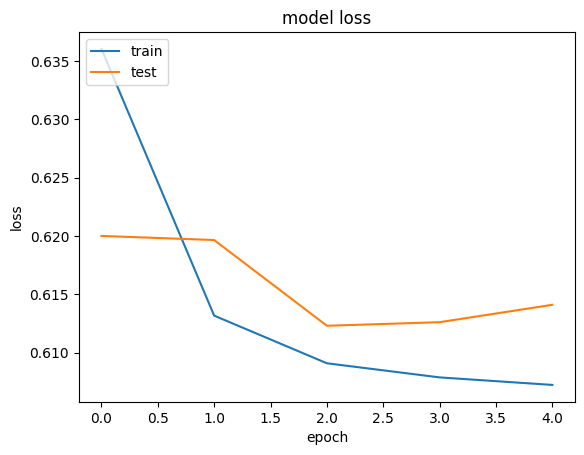

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Run matrix factorization


In [ ]:
def matrix_factorization(user_item, rank):
    weights, (user_factors, item_factors) = \
        decomposition.parafac(user_item, rank)
    similarities = user_factors @ item_factors.T
    return 1 / (1 + np.exp(- similarities))

We observe that our LightGCN model delivers betters performance than matrix factorization.

In [ ]:
# Compute baseline metrics using matrix factorization.
baseline_pred = matrix_factorization(
        data["edge_index"].detach().cpu().numpy(),
        config_dict["mf_rank"])[user_indices.cpu(), item_indices.cpu()]
baseline_topk_precision, baseline_topk_recall = \
        personalized_topk(baseline_pred, K, user_indices, data["edge_index"])
print("Baseline produces ",
      "Top K precision = {}, recall = {}.".format(baseline_topk_precision,
                                                  baseline_topk_recall))

# GNN

In [ ]:
tf.tensordot([1,2],[3,4],1)

<tf.Tensor: shape=(), dtype=int32, numpy=11>

In [ ]:
tmp = np.array([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])
tmp[:, 0]

array([1, 3, 5, 7])

In [ ]:
# %%capture
! pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
! pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html

!pip install torch-geometric
!pip install -q git+https://github.com/snap-stanford/deepsnap.git
!pip install -U -q PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.1-cp39-cp39-linux_x86_64.whl size=3518815 sha256=518da1e63ed110d0147154b026d599694e0cab6d5197a9dd036fa29c93a2c827
  Stored in directory: /root/.cache/pip/wheels/d5/0c/18/11b4cf31446c5d460543b0fff930fcac3a3f8a785e5c73fb15
Successfully built torch-scatter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.17-cp39-cp39-linux_x86_64.whl si

In [ ]:
# import required modules
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim, Tensor

from torch_sparse import SparseTensor, matmul

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.data import download_url, extract_zip
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn.conv import MessagePassing
from torch_geometric.typing import Adj

In [ ]:
# download the dataset
url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

movie_path = './ml-latest-small/movies.csv'
rating_path = './ml-latest-small/ratings.csv'
# load user and movie nodes
def load_node_csv(path, index_col):
    """Loads csv containing node information

    Args:
        path (str): path to csv file
        index_col (str): column name of index column

    Returns:
        dict: mapping of csv row to node id
    """
    df = pd.read_csv(path, index_col=index_col)
    mapping = {index: i for i, index in enumerate(df.index.unique())}
    return mapping


user_mapping = load_node_csv(rating_path, index_col='userId')
movie_mapping = load_node_csv(movie_path, index_col='movieId')

Extracting ./ml-latest-small.zip


In [ ]:
# load edges between users and movies
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping, link_index_col, rating_threshold=4):
    """Loads csv containing edges between users and items

    Args:
        path (str): path to csv file
        src_index_col (str): column name of users
        src_mapping (dict): mapping between row number and user id
        dst_index_col (str): column name of items
        dst_mapping (dict): mapping between row number and item id
        link_index_col (str): column name of user item interaction
        rating_threshold (int, optional): Threshold to determine positivity of edge. Defaults to 4.

    Returns:
        torch.Tensor: 2 by N matrix containing the node ids of N user-item edges
    """
    df = pd.read_csv(path)
    edge_index = None
    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_attr = torch.from_numpy(df[link_index_col].values).view(-1, 1).to(torch.long) >= rating_threshold


    edge_index = [[], []]
    for i in range(edge_attr.shape[0]):
        if edge_attr[i]:
            edge_index[0].append(src[i])
            edge_index[1].append(dst[i])

    return torch.tensor(edge_index)


edge_index = load_edge_csv(
    rating_path,
    src_index_col='userId',
    src_mapping=user_mapping,
    dst_index_col='movieId',
    dst_mapping=movie_mapping,
    link_index_col='rating',
    rating_threshold=3,
)

In [ ]:
# split the edges of the graph using a 80/10/10 train/validation/test split
num_users, num_movies = len(user_mapping), len(movie_mapping)
num_interactions = edge_index.shape[1]
all_indices = [i for i in range(num_interactions)]

train_indices, test_indices = train_test_split(
    all_indices, test_size=0.2, random_state=1)
val_indices, test_indices = train_test_split(
    test_indices, test_size=0.5, random_state=1)

train_edge_index = edge_index[:, train_indices]
val_edge_index = edge_index[:, val_indices]
test_edge_index = edge_index[:, test_indices]

In [ ]:
train_sparse_edge_index = SparseTensor(row=train_edge_index[0], col=train_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
val_sparse_edge_index = SparseTensor(row=val_edge_index[0], col=val_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))
test_sparse_edge_index = SparseTensor(row=test_edge_index[0], col=test_edge_index[1], sparse_sizes=(
    num_users + num_movies, num_users + num_movies))

In [ ]:
def sample_mini_batch(batch_size, edge_index):
    """Randomly samples indices of a minibatch given an adjacency matrix

    Args:
        batch_size (int): minibatch size
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        tuple: user indices, positive item indices, negative item indices
    """
    edges = structured_negative_sampling(edge_index)
    edges = torch.stack(edges, dim=0)
    indices = random.choices(
        [i for i in range(edges[0].shape[0])], k=batch_size)
    batch = edges[:, indices]
    user_indices, pos_item_indices, neg_item_indices = batch[0], batch[1], batch[2]
    return user_indices, pos_item_indices, neg_item_indices

In [ ]:
class LightGCN(MessagePassing):
    """LightGCN Model as proposed in https://arxiv.org/abs/2002.02126
    """

    def __init__(self, num_users, num_items, embedding_dim=64, K=3, add_self_loops=False):
        """Initializes LightGCN Model

        Args:
            num_users (int): Number of users
            num_items (int): Number of items
            embedding_dim (int, optional): Dimensionality of embeddings. Defaults to 8.
            K (int, optional): Number of message passing layers. Defaults to 3.
            add_self_loops (bool, optional): Whether to add self loops for message passing. Defaults to False.
        """
        super().__init__()
        self.num_users, self.num_items = num_users, num_items
        self.embedding_dim, self.K = embedding_dim, K
        self.add_self_loops = add_self_loops

        self.users_emb = nn.Embedding(
            num_embeddings=self.num_users, embedding_dim=self.embedding_dim) # e_u^0
        self.items_emb = nn.Embedding(
            num_embeddings=self.num_items, embedding_dim=self.embedding_dim) # e_i^0

        nn.init.normal_(self.users_emb.weight, std=0.1)
        nn.init.normal_(self.items_emb.weight, std=0.1)

    def forward(self, edge_index: SparseTensor):
        """Forward propagation of LightGCN Model.

        Args:
            edge_index (SparseTensor): adjacency matrix

        Returns:
            tuple (Tensor): e_u_k, e_u_0, e_i_k, e_i_0
        """
        # compute \tilde{A}: symmetrically normalized adjacency matrix
        edge_index_norm = gcn_norm(
            edge_index, add_self_loops=self.add_self_loops)

        emb_0 = torch.cat([self.users_emb.weight, self.items_emb.weight]) # E^0
        embs = [emb_0]
        emb_k = emb_0

        # multi-scale diffusion
        for i in range(self.K):
            emb_k = self.propagate(edge_index_norm, x=emb_k)
            embs.append(emb_k)

        embs = torch.stack(embs, dim=1)
        emb_final = torch.mean(embs, dim=1) # E^K

        users_emb_final, items_emb_final = torch.split(
            emb_final, [self.num_users, self.num_items]) # splits into e_u^K and e_i^K

        # returns e_u^K, e_u^0, e_i^K, e_i^0
        return users_emb_final, self.users_emb.weight, items_emb_final, self.items_emb.weight

    def message(self, x_j: Tensor) -> Tensor:
        return x_j

    def message_and_aggregate(self, adj_t: SparseTensor, x: Tensor) -> Tensor:
        # computes \tilde{A} @ x
        return matmul(adj_t, x)

model = LightGCN(num_users, num_movies)

In [ ]:
def bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, lambda_val):
    """Bayesian Personalized Ranking Loss as described in https://arxiv.org/abs/1205.2618

    Args:
        users_emb_final (torch.Tensor): e_u_k
        users_emb_0 (torch.Tensor): e_u_0
        pos_items_emb_final (torch.Tensor): positive e_i_k
        pos_items_emb_0 (torch.Tensor): positive e_i_0
        neg_items_emb_final (torch.Tensor): negative e_i_k
        neg_items_emb_0 (torch.Tensor): negative e_i_0
        lambda_val (float): lambda value for regularization loss term

    Returns:
        torch.Tensor: scalar bpr loss value
    """
    reg_loss = lambda_val * (users_emb_0.norm(2).pow(2) +
                             pos_items_emb_0.norm(2).pow(2) +
                             neg_items_emb_0.norm(2).pow(2)) # L2 loss

    pos_scores = torch.mul(users_emb_final, pos_items_emb_final)
    pos_scores = torch.sum(pos_scores, dim=-1) # predicted scores of positive samples
    neg_scores = torch.mul(users_emb_final, neg_items_emb_final)
    neg_scores = torch.sum(neg_scores, dim=-1) # predicted scores of negative samples

    loss = -torch.mean(torch.nn.functional.softplus(pos_scores - neg_scores)) + reg_loss

    return loss

In [ ]:
def get_user_positive_items(edge_index):
    """Generates dictionary of positive items for each user

    Args:
        edge_index (torch.Tensor): 2 by N list of edges

    Returns:
        dict: dictionary of positive items for each user
    """
    user_pos_items = {}
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_pos_items:
            user_pos_items[user] = []
        user_pos_items[user].append(item)
    return user_pos_items



# computes recall@K and precision@K
def RecallPrecision_ATk(groundTruth, r, k):
    """Computers recall @ k and precision @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (intg): determines the top k items to compute precision and recall on

    Returns:
        tuple: recall @ k, precision @ k
    """
    num_correct_pred = torch.sum(r, dim=-1)  # number of correctly predicted items per user
    # number of items liked by each user in the test set
    user_num_liked = torch.Tensor([len(groundTruth[i])
                                  for i in range(len(groundTruth))])
    recall = torch.mean(num_correct_pred / user_num_liked)
    precision = torch.mean(num_correct_pred) / k
    return recall.item(), precision.item()

# computes NDCG@K
def NDCGatK_r(groundTruth, r, k):
    """Computes Normalized Discounted Cumulative Gain (NDCG) @ k

    Args:
        groundTruth (list): list of lists containing highly rated items of each user
        r (list): list of lists indicating whether each top k item recommended to each user
            is a top k ground truth item or not
        k (int): determines the top k items to compute ndcg on

    Returns:
        float: ndcg @ k
    """
    assert len(r) == len(groundTruth)

    test_matrix = torch.zeros((len(r), k))

    for i, items in enumerate(groundTruth):
        length = min(len(items), k)
        test_matrix[i, :length] = 1
    max_r = test_matrix
    idcg = torch.sum(max_r * 1. / torch.log2(torch.arange(2, k + 2)), axis=1)
    dcg = r * (1. / torch.log2(torch.arange(2, k + 2)))
    dcg = torch.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[torch.isnan(ndcg)] = 0.
    return torch.mean(ndcg).item()  
# wrapper function to get evaluation metrics
def get_metrics(model, edge_index, exclude_edge_indices, k):
    """Computes the evaluation metrics: recall, precision, and ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on

    Returns:
        tuple: recall @ k, precision @ k, ndcg @ k
    """
    user_embedding = model.users_emb.weight
    item_embedding = model.items_emb.weight

    # get ratings between every user and item - shape is num users x num movies
    rating = torch.matmul(user_embedding, item_embedding.T) # 这里
    # mse = nn.MSELoss()
    # output = mse(rating, target)


    for exclude_edge_index in exclude_edge_indices:
        # gets all the positive items for each user from the edge index
        user_pos_items = get_user_positive_items(exclude_edge_index)
        # get coordinates of all edges to exclude
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)

        # set ratings of excluded edges to large negative value
        rating[exclude_users, exclude_items] = -(1 << 10)

    # get the top k recommended items for each user
    _, top_K_items = torch.topk(rating, k=k)

    # get all unique users in evaluated split
    users = edge_index[0].unique()

    test_user_pos_items = get_user_positive_items(edge_index)

    # convert test user pos items dictionary into a list
    test_user_pos_items_list = [
        test_user_pos_items[user.item()] for user in users]

    # determine the correctness of topk predictions
    r = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        r.append(label)
    r = torch.Tensor(np.array(r).astype('float'))

    recall, precision = RecallPrecision_ATk(test_user_pos_items_list, r, k)
    ndcg = NDCGatK_r(test_user_pos_items_list, r, k)

    return recall, precision, ndcg



In [ ]:
# wrapper function to evaluate model
def evaluation(model, edge_index, sparse_edge_index, exclude_edge_indices, k, lambda_val):
    """Evaluates model loss and metrics including recall, precision, ndcg @ k

    Args:
        model (LighGCN): lightgcn model
        edge_index (torch.Tensor): 2 by N list of edges for split to evaluate
        sparse_edge_index (sparseTensor): sparse adjacency matrix for split to evaluate
        exclude_edge_indices ([type]): 2 by N list of edges for split to discount from evaluation
        k (int): determines the top k items to compute metrics on
        lambda_val (float): determines lambda for bpr loss

    Returns:
        tuple: bpr loss, recall @ k, precision @ k, ndcg @ k
    """
    # get embeddings
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        sparse_edge_index)
    edges = structured_negative_sampling(
        edge_index, contains_neg_self_loops=False)
    user_indices, pos_item_indices, neg_item_indices = edges[0], edges[1], edges[2]
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final, pos_items_emb_0,
                    neg_items_emb_final, neg_items_emb_0, lambda_val).item()

    recall, precision, ndcg = get_metrics(
        model, edge_index, exclude_edge_indices, k)

    return loss, recall, precision, ndcg

In [ ]:
# define contants
ITERATIONS = 10000
BATCH_SIZE = 1024
LR = 1e-3
ITERS_PER_EVAL = 200
ITERS_PER_LR_DECAY = 200
K = 20
LAMBDA = 1e-6

In [ ]:
# setup
from sklearn.metrics import mean_squared_error
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {device}.")


model = model.to(device)
model.train()

optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

edge_index = edge_index.to(device) # edge_index torch.Size([2, 48580])
train_edge_index = train_edge_index.to(device) # torch.Size([2, 38864])
train_sparse_edge_index = train_sparse_edge_index.to(device)

val_edge_index = val_edge_index.to(device)# torch.Size([2, 4858])
val_sparse_edge_index = val_sparse_edge_index.to(device)

Using device cuda.


In [ ]:
# training loop
train_losses = []
val_losses = []
train_pre = []
val_pre = []
train_rec = []
val_rec = []
train_ndcg = []
val_ndcg = []

for iter in range(ITERATIONS):
    # forward propagation
    users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
        train_sparse_edge_index)

    # mini batching
    user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
        BATCH_SIZE, train_edge_index)
    user_indices, pos_item_indices, neg_item_indices = user_indices.to(
        device), pos_item_indices.to(device), neg_item_indices.to(device)
    users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
    pos_items_emb_final, pos_items_emb_0 = items_emb_final[
        pos_item_indices], items_emb_0[pos_item_indices]
    neg_items_emb_final, neg_items_emb_0 = items_emb_final[
        neg_item_indices], items_emb_0[neg_item_indices]

    # loss computation
    train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                          pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)
    # train_mse = mean_squared_error() # 这里没写完 查看一下r和get_user_positive_items（）在get_metrics中怎么用的
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    

    if iter % ITERS_PER_EVAL == 0:
        model.eval()
        val_loss, recall, precision, ndcg = evaluation(
            model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)
        print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}")
        
        _, tr_recall, tr_precision, tr_ndcg = evaluation(
            model, train_edge_index, train_sparse_edge_index, [], K, LAMBDA)
        train_losses.append(train_loss.item())
        val_losses.append(val_loss)
        train_pre.append(tr_precision)
        val_pre.append(precision)
        train_rec.append(tr_recall)
        val_rec.append(recall)
        train_ndcg.append(tr_ndcg)
        val_ndcg.append(ndcg)
        model.train()

    if iter % ITERS_PER_LR_DECAY == 0 and iter != 0:
        scheduler.step()

[Iteration 0/10000] train_loss: -0.69103, val_loss: -0.67753, val_recall@20: 0.00143, val_precision@20: 0.00094, val_ndcg@20: 0.00124
[Iteration 200/10000] train_loss: -0.69813, val_loss: -0.68305, val_recall@20: 0.03909, val_precision@20: 0.02027, val_ndcg@20: 0.03425
[Iteration 400/10000] train_loss: -0.8519, val_loss: -0.78416, val_recall@20: 0.12386, val_precision@20: 0.05477, val_ndcg@20: 0.10554
[Iteration 600/10000] train_loss: -1.63912, val_loss: -1.35176, val_recall@20: 0.12847, val_precision@20: 0.05843, val_ndcg@20: 0.11266
[Iteration 800/10000] train_loss: -3.13227, val_loss: -2.43972, val_recall@20: 0.12589, val_precision@20: 0.06014, val_ndcg@20: 0.11416
[Iteration 1000/10000] train_loss: -5.39594, val_loss: -3.88098, val_recall@20: 0.12767, val_precision@20: 0.06158, val_ndcg@20: 0.11526
[Iteration 1200/10000] train_loss: -7.1593, val_loss: -5.35249, val_recall@20: 0.12539, val_precision@20: 0.0615, val_ndcg@20: 0.1149
[Iteration 1400/10000] train_loss: -9.18992, val_los

In [ ]:
users_emb_final, users_emb_0, items_emb_final, items_emb_0 = model.forward(
    train_sparse_edge_index)
# users_emb_final, users_emb_0 ([1024, 64])
# items_emb_final, items_emb_0 ([9742, 64])



# mini batching
user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(
    BATCH_SIZE, train_edge_index)
# user_indices [1024]
user_indices, pos_item_indices, neg_item_indices = user_indices.to(
    device), pos_item_indices.to(device), neg_item_indices.to(device)
users_emb_final, users_emb_0 = users_emb_final[user_indices], users_emb_0[user_indices]
# users_emb_final ([1024, 64])
pos_items_emb_final, pos_items_emb_0 = items_emb_final[
    pos_item_indices], items_emb_0[pos_item_indices]
# pos_items_emb_final ([1024, 64])
neg_items_emb_final, neg_items_emb_0 = items_emb_final[
    neg_item_indices], items_emb_0[neg_item_indices]

# loss computation
train_loss = bpr_loss(users_emb_final, users_emb_0, pos_items_emb_final,
                        pos_items_emb_0, neg_items_emb_final, neg_items_emb_0, LAMBDA)
# train_mse = mean_squared_error() # 这里没写完 查看一下r和get_user_positive_items（）在get_metrics中怎么用的
optimizer.zero_grad()
train_loss.backward()
optimizer.step()

if iter % ITERS_PER_EVAL == 0:
    model.eval()
    val_loss, recall, precision, ndcg = evaluation(
        model, val_edge_index, val_sparse_edge_index, [train_edge_index], K, LAMBDA)
    print(f"[Iteration {iter}/{ITERATIONS}] train_loss: {round(train_loss.item(), 5)}, val_loss: {round(val_loss, 5)}, val_recall@{K}: {round(recall, 5)}, val_precision@{K}: {round(precision, 5)}, val_ndcg@{K}: {round(ndcg, 5)}")
    train_losses.append(train_loss.item())
    val_losses.append(val_loss)
    # train_mse = mean_squared_error() # 这里没写完 查看一下r和get_user_positive_items（）在get_metrics中怎么用的

    model.train()

In [ ]:
torch.mul(users_emb_final, pos_items_emb_final).shape

torch.Size([1024, 64])

In [ ]:
torch.sum(torch.mul(users_emb_final, pos_items_emb_final), dim=-1).shape # pos_score

torch.Size([1024])

In [ ]:
user_embedding = model.users_emb.weight # torch.Size([610, 64])
item_embedding = model.items_emb.weight # torch.Size([9742, 64])

# get ratings between every user and item - shape is num users x num movies
rating = torch.matmul(user_embedding, item_embedding.T) # torch.Size([610, 9742])
# get the top k recommended items for each user
_, top_K_items = torch.topk(rating, k=K) # shape torch.Size([610, 20])


# get all unique users in evaluated split
users = train_edge_index[0].unique() # torch.Size([609])

test_user_pos_items = get_user_positive_items(train_edge_index) # (609 items)

# convert test user pos items dictionary into a list # As groundTruth
test_user_pos_items_list = [
    test_user_pos_items[user.item()] for user in users] # (609 items) [[43, 2259, 484, 899, 734, ...], [1284, 7590,

# determine the correctness of topk predictions
r = []
for user in users:
    ground_truth_items = test_user_pos_items[user.item()] # (479 items) [8950, 9221, 8151, 6107, 8469, ...]
    label = list(map(lambda x: x in ground_truth_items, top_K_items[user])) # (20 items) [False, True, False, True, False, ...]
    r.append(label)
r = torch.Tensor(np.array(r).astype('float')) # torch.Size([609, 20])

In [ ]:
top_K_items[users[0]]

tensor([ 277,  257,  314,  510, 1939,  224, 2226,  461,   97,  898,  659,  507,
          46,  900, 2145,  911,    0,  418,  520,  398], device='cuda:0')

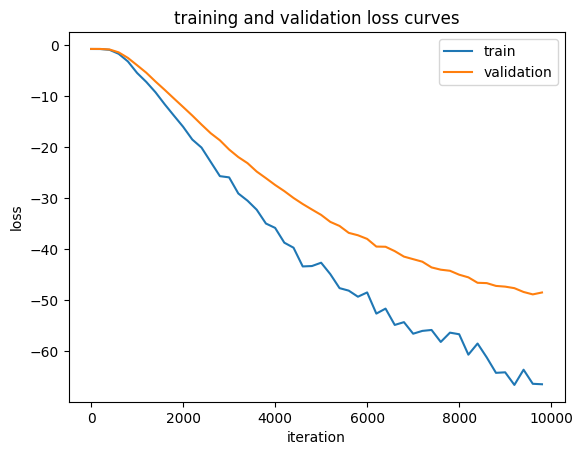

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_losses))]
plt.plot(iters, train_losses, label='train')
plt.plot(iters, val_losses, label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('training and validation loss curves')
plt.legend()
plt.show()

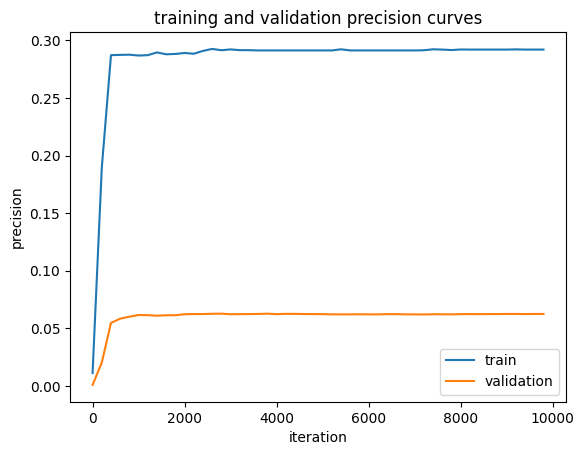

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_pre))]
plt.plot(iters, train_pre, label='train')
plt.plot(iters, val_pre, label='validation')
plt.xlabel('iteration')
plt.ylabel('precision')
plt.title('training and validation precision curves')
plt.legend()
plt.show()



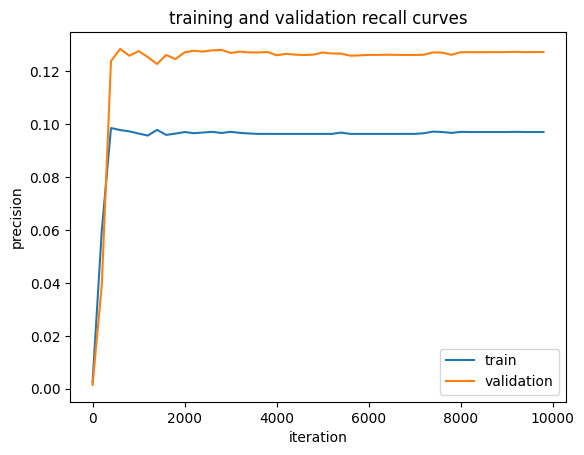

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_rec))]
plt.plot(iters, train_rec, label='train')
plt.plot(iters, val_rec, label='validation')
plt.xlabel('iteration')
plt.ylabel('precision')
plt.title('training and validation recall curves')
plt.legend()
plt.show()

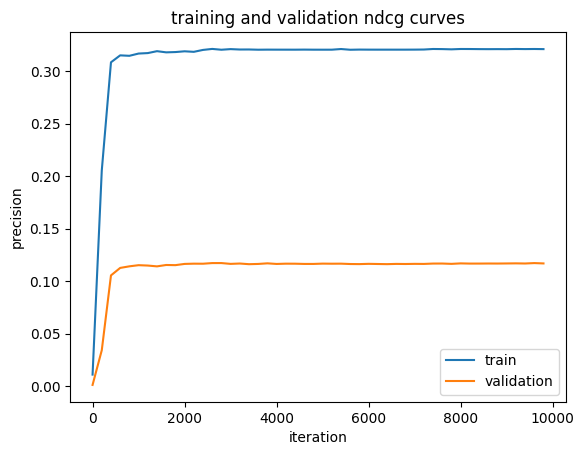

In [ ]:
iters = [iter * ITERS_PER_EVAL for iter in range(len(train_ndcg))]
plt.plot(iters, train_ndcg, label='train')
plt.plot(iters, val_ndcg, label='validation')
plt.xlabel('iteration')
plt.ylabel('precision')
plt.title('training and validation ndcg curves')
plt.legend()
plt.show()

In [ ]:
# evaluate on test set
model.eval()
test_edge_index = test_edge_index.to(device)
test_sparse_edge_index = test_sparse_edge_index.to(device)

test_loss, test_recall, test_precision, test_ndcg = evaluation(
            model, test_edge_index, test_sparse_edge_index, [train_edge_index, val_edge_index], K, LAMBDA)

print(f"[test_loss: {round(test_loss, 5)}, test_recall@{K}: {round(test_recall, 5)}, test_precision@{K}: {round(test_precision, 5)}, test_ndcg@{K}: {round(test_ndcg, 5)}")

[test_loss: -51.74636, test_recall@20: 0.12836, test_precision@20: 0.04674, test_ndcg@20: 0.10293


In [ ]:
with open("train_ndcg.txt", "w") as output:
    output.write(str(train_ndcg))

In [ ]:
with open("val_ndcg.txt", "w") as output:
    output.write(str(val_ndcg))

# Make New Recommendatios for a Given User

In [ ]:
model.eval()
df = pd.read_csv(movie_path)
movieid_title = pd.Series(df.title.values,index=df.movieId).to_dict()
movieid_genres = pd.Series(df.genres.values,index=df.movieId).to_dict()

user_pos_items = get_user_positive_items(edge_index)

In [ ]:
def make_predictions(user_id, num_recs):
    user = user_mapping[user_id]
    e_u = model.users_emb.weight[user]
    scores = model.items_emb.weight @ e_u

    values, indices = torch.topk(scores, k=len(user_pos_items[user]) + num_recs)

    movies = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some movies that user {user_id} rated highly")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

    print()

    movies = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    movie_ids = [list(movie_mapping.keys())[list(movie_mapping.values()).index(movie)] for movie in movies]
    titles = [movieid_title[id] for id in movie_ids]
    genres = [movieid_genres[id] for id in movie_ids]

    print(f"Here are some suggested movies for user {user_id}")
    for i in range(num_recs):
        print(f"title: {titles[i]}, genres: {genres[i]} ")

In [ ]:
USER_ID = 1
NUM_RECS = 10

make_predictions(USER_ID, NUM_RECS)

Here are some movies that user 1 rated highly
title: Forrest Gump (1994), genres: Comedy|Drama|Romance|War 
title: Matrix, The (1999), genres: Action|Sci-Fi|Thriller 
title: Silence of the Lambs, The (1991), genres: Crime|Horror|Thriller 
title: Star Wars: Episode IV - A New Hope (1977), genres: Action|Adventure|Sci-Fi 
title: Star Wars: Episode V - The Empire Strikes Back (1980), genres: Action|Adventure|Sci-Fi 
title: Fight Club (1999), genres: Action|Crime|Drama|Thriller 
title: Braveheart (1995), genres: Action|Drama|War 
title: Schindler's List (1993), genres: Drama|War 
title: Star Wars: Episode VI - Return of the Jedi (1983), genres: Action|Adventure|Sci-Fi 
title: American Beauty (1999), genres: Drama|Romance 

Here are some suggested movies for user 1
title: Shawshank Redemption, The (1994), genres: Crime|Drama 
title: Pulp Fiction (1994), genres: Comedy|Crime|Drama|Thriller 
title: Godfather, The (1972), genres: Crime|Drama 
title: Terminator 2: Judgment Day (1991), genres: A